In [1]:
import segmentation_models as sm
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
from tensorflow.keras.metrics import MeanIoU
import itertools
import numpy as np
from numpy import loadtxt
from tensorflow import keras
import pickle
import matplotlib.pyplot as plt

model_name="C:/Users/moham/Desktop/MyDeepLearningProject/transferLearning/ModelCheckPoints/resnet34_withMask25610k5k.h5"
# model = load_model('SecondModel_50_Epochs.h5')
# model =load_model(model_name, compile=True)
model = keras.models.load_model(model_name, compile=False)
model.compile(optimizer='adam', loss=bce_jaccard_loss, metrics=['accuracy',iou_score])

Segmentation Models: using `keras` framework.


In [6]:
# preprocess_input=sm.get_preprocessing('resnet34')
model.summary()
# model.compile(optimizer='adam', loss=bce_jaccard_loss, metrics=['accuracy',iou_score])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [2]:
from tensorflow.keras.utils import to_categorical
x_val = pickle.load(open("Datasets/WithMask256_first_10k_5k/X_val.pickle","rb"))
y_val = pickle.load(open("Datasets/WithMask256_first_10k_5k/y_val.pickle","rb"))

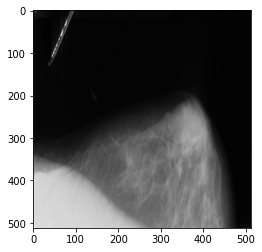

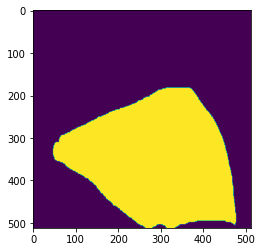

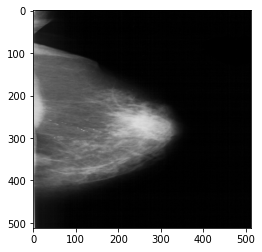

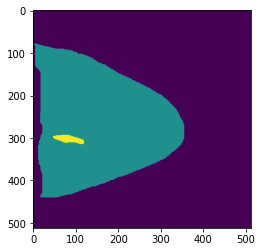

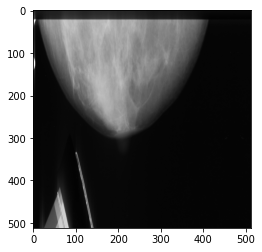

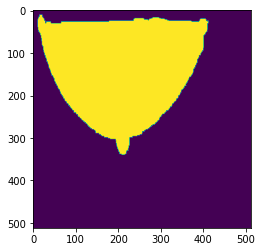

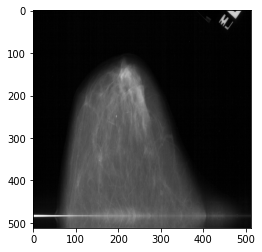

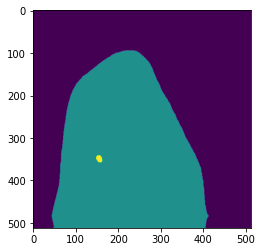

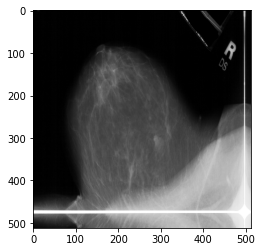

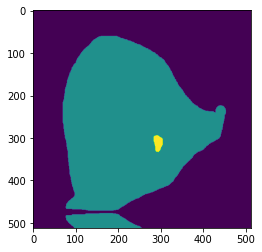

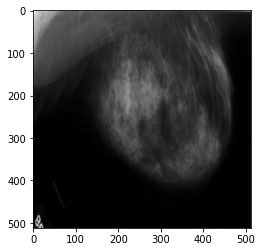

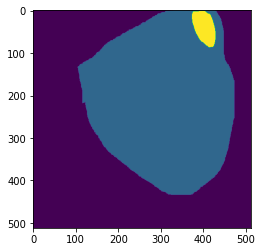

In [5]:
num=0
for img,mask in zip(x_val,y_val):
	plt.imshow(img)
	plt.show()
	plt.imshow(mask)
	plt.show()
	num=num+1
	if (num>5):
		break

In [3]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)
sm.set_framework('tf.keras')
x_val=preprocess_input(x_val)
n_classes = len(np.unique(y_val))
labels_test = np.expand_dims(y_val, axis=3)
test_masks_cat = to_categorical(labels_test, num_classes=n_classes)

y_pred1=model.predict(x_val)
y_pred1_argmax = np.argmax(y_pred1, axis=3)
# y_pred1_argmax = (y_pred1 > 0.5).astype(np.uint8)
#Using built in keras function
#from keras.metrics import MeanIoU
n_classes = len(np.unique(y_val))
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(labels_test[:,:,:,0], y_pred1_argmax)
print("Mean IoU =", IOU_keras.result().numpy())


#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] +values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] +values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])

print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
print("IoU for class4 is: ", class4_IoU)

Mean IoU = 0.4523394
[[1.6777216e+07 2.6232110e+06 5.9300000e+02 1.1761000e+04]
 [1.2752980e+06 1.6777216e+07 1.5070400e+05 1.2063000e+05]
 [1.1766000e+04 2.7735600e+05 2.8182000e+04 2.3225000e+04]
 [1.1007000e+04 3.4193900e+05 3.7608000e+04 1.1038200e+05]]
IoU for class1 is:  0.81006885
IoU for class2 is:  0.7779347
IoU for class3 is:  0.05323043
IoU for class4 is:  0.16812377


In [4]:
_,acc=model.evaluate(x_val,test_masks_cat)
print("Accuracy= ",(acc*100.0),"%")

32/32 [==============================] - 6s 138ms/step - loss: 0.6164 - accuracy: 0.9255 - iou_score: 0.4846

ValueError: too many values to unpack (expected 2)

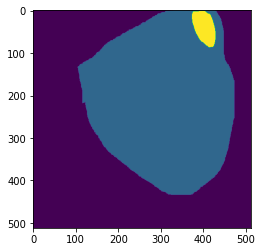

In [7]:
# import numpy as np
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt
# labels = np.expand_dims(y_val, axis=3)
# plt.imshow(labels[5][:,:,0])
# plt.show()
# n_classes = len(np.unique(labels))
# from tensorflow.keras.utils import to_categorical
# labels_cat = to_categorical(labels, num_classes=n_classes)

In [5]:
from tensorflow.keras.utils import to_categorical
labels_test = np.expand_dims(y_val, axis=3)
n_classes = len(np.unique(y_val))

test_masks_cat = to_categorical(labels_test, num_classes=n_classes)
CAT=['Background','Normal','Benign','Cancer']

Ground Truth labels-[0 1 2]
Predicted labels-[0 1]


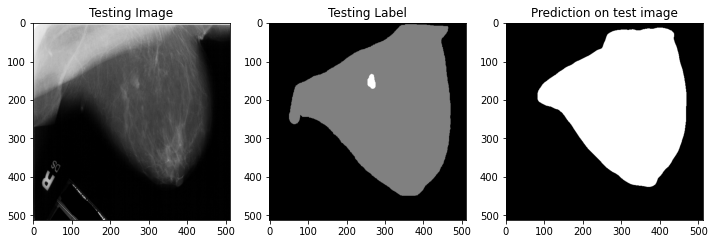

In [8]:
CAT=['Background','Normal','Benign','Cancer']
# CAT=['Background','Breast region']
import random
# get a random image from validation set
test_img_number = random.randint(0, len(x_val))
test_img = x_val[test_img_number]
ground_truth=y_val[test_img_number]
# test_img_norm=test_img[:,:,0][:,:,None]
testlabels=np.unique(ground_truth)
print(f'Ground Truth labels-{testlabels}')
test_img_input=np.expand_dims(test_img,0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]
# predicted_img = (prediction > 0.5).astype(np.uint8)
predlabels=np.unique(predicted_img)
print(f'Predicted labels-{predlabels}')
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth, cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='gray')
plt.show()

In [11]:
CAT=['Background','Normal','Benign','Cancer']
# CAT=['Benign','Cancer','Normal']
# CAT=['CancerOrBenign','Normal']
import matplotlib.pyplot as plt
import numpy as np

test_img = x_val[test_img_number]
ground_truth=y_val[test_img_number]
myLabel = len(np.unique(predicted_img))
# y_pred=(model.predict(X_test)>my_threshold).astype(int)
print("Actual label: "+CAT[myLabel])
# print("Actual label = "+CAT[myLabel[0]])
# preds=(model.predict(X_test)>my_threshold).astype(int)
preds=model.predict(x_val[20:21])
predicted_img=np.argmax(preds, axis=3)[0,:,:]
predlabels=np.unique(predicted_img)
predlabels=np.argmax(predlabels)
# if preds[0]>=0.5:
# 	preds=1
# else:
# 	preds=0
print("Predicted label: "+CAT[predlabels])

Actual label: Benign
Predicted label: Normal


In [32]:
preds=model.predict(x_val)
preds=np.argmax(preds, axis=3)
pred_labels=np.unique(preds,axis=0)
print("unique labels in first image are "+str(pred_labels))
y_test_rounded=test_masks_cat
# y_test_rounded=np.argmax(y_val)

unique labels in first image are [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=y_test_rounded, y_pred=preds)

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
	plt.imshow(cm, interpolation='nearest', cmap=cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks,classes, rotation=45)
	plt.yticks(tick_marks,classes)

	if normalize:
		cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
		print("Normalized Confusion matrix")
	else:
		print("Confusion matrix, without normalization")

	print(cm)

	thresh = cm.max()/ 2.
	for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j,i,cm[i,j],
				 horizontalalignment="center",
				 color="white" if cm[i,j] > thresh else "black")

	plt.tight_layout()
	plt.ylabel('true label')
	plt.xlabel('predicted label')

ValueError: unknown is not supported

In [38]:
cm_plot_labels = CAT
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title='Confusion Matrix')

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))